### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [150]:
data = pd.read_csv('data/coupons.csv')

In [151]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [152]:
data["destination"]

0        No Urgent Place
1        No Urgent Place
2        No Urgent Place
3        No Urgent Place
4        No Urgent Place
              ...       
12679               Home
12680               Work
12681               Work
12682               Work
12683               Work
Name: destination, Length: 12684, dtype: object

In [153]:
# what columns/attributes are available?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [154]:
# which columns have NaN/Null data and in how many?
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [157]:
# Let's clean up the spelling error in the column name "passanger"
data.rename({'passanger': 'passenger'}, axis=1, inplace=True) 
data.info()
# Changing the data type of 'age' to numeric failed because 
# several values containt the string "50plus" and "below21" so 
# let's convert those to numeric strings

data['age'] = data['age'].replace("50plus", "50")
data['age'] = data['age'].replace("below21", "19")


# now we can change the column to numeric
data['age'] = pd.to_numeric(data['age'])




<class 'pandas.core.frame.DataFrame'>
Index: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null  obj

## Investigate whether we need to clean/remove cars column given how much missing data there is

In [158]:
# show all rows of data
# pd.options.display.max_rows = 200

# show me what data does exist in the car column
car_non_nulls = data.loc[data['car'].notnull(), ['car']]
car_non_nulls


,car
1237,Scooter and motorcycle
1238,Scooter and motorcycle
1239,Scooter and motorcycle
1240,Scooter and motorcycle
1241,Scooter and motorcycle
...,...
8293,Car that is too old to install Onstar :D
8294,Car that is too old to install Onstar :D
8295,Car that is too old to install Onstar :D
8296,Car that is too old to install Onstar :D


## Investigate whether the destinations columns need to be cleaned removed

In [159]:
# Which rows have nulls in the destination columns?
destinations = data[['Bar', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50', 'CarryAway']]
print(destinations[destinations.isnull().any(axis=1)])

# rest the number of rows displayed to something saner
pd.options.display.max_rows = 100


         Bar CoffeeHouse RestaurantLessThan20 Restaurant20To50 CarryAway
0      never       never                  4~8              1~3       NaN
1      never       never                  4~8              1~3       NaN
2      never       never                  4~8              1~3       NaN
3      never       never                  4~8              1~3       NaN
4      never       never                  4~8              1~3       NaN
...      ...         ...                  ...              ...       ...
12409  less1         NaN                  1~3              1~3       1~3
12410  less1         NaN                  1~3              1~3       1~3
12411  less1         NaN                  1~3              1~3       1~3
12412  less1         NaN                  1~3              1~3       1~3
12413  less1         NaN                  1~3              1~3       1~3

[605 rows x 5 columns]


3. Decide what to do about your missing data -- drop, replace, other...

In [160]:
# read in the original data again
#data = pd.read_csv('data/coupons.csv')


# The cars column is mostly NaN. The non-null data in the rows isn't pariticularly useful, 
# so let's drop the column altogether
data = data.drop('car', axis=1)

# The difference between "Never" and NaN is ambiguous. It's unfortuante the survey didn't force a useful value.
# We could assume NaN is equivalent to "Never", but that may skew the data.
# Given that we have 12K rows and only 605 with a NaN value in a destination column, 
# dropping those 605 rows should still give us sufficient data for analysis
# So let's do that.
data.dropna(subset=['Bar', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50', 'CarryAway'], inplace=True)

# We've affectively dropped all rows with null values, so let's make sure
data.isna().sum()



destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [161]:
# Now we have clean destination data, but the values are text and not numerical. 
# possible values = 0, less than 1, 1 to 3, 4 to 8 or greater than 8
# what are the actual values given to the columns?

print(data.Bar.unique())
print(data.CoffeeHouse.unique())
print(data.RestaurantLessThan20.unique())
print(data.Restaurant20To50.unique())
print(data.CarryAway.unique())

print(data.shape)

['never' 'less1' '1~3' 'gt8' '4~8']
['less1' '4~8' '1~3' 'gt8' 'never']
['4~8' '1~3' 'less1' 'gt8' 'never']
['less1' 'never' '1~3' 'gt8' '4~8']
['4~8' '1~3' 'gt8' 'less1' 'never']
(12079, 25)


4. What proportion of the total observations chose to accept the coupon? 

In [163]:
# With null rows removed, # ~57% of the remaining 12079 
# observations accepted the coupon.
print(data['Y'].value_counts())
data['Y'].value_counts()[1] / data.shape[0] * 100


Y
1    6877
0    5202
Name: count, dtype: int64


56.93352098683666

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

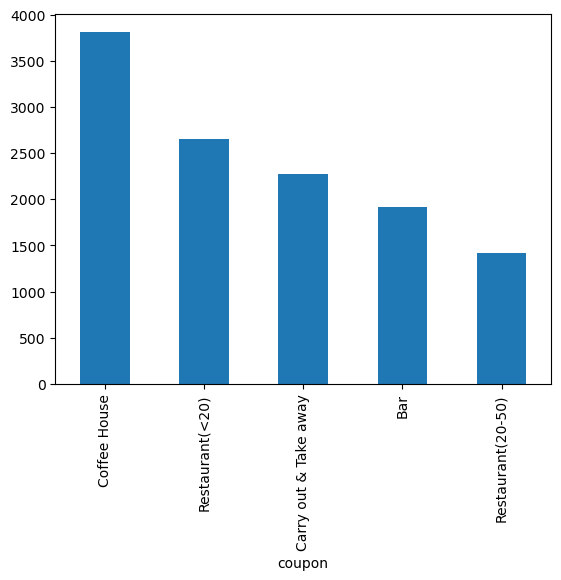

In [304]:
data['coupon'].value_counts().plot(kind='bar')


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature Values')

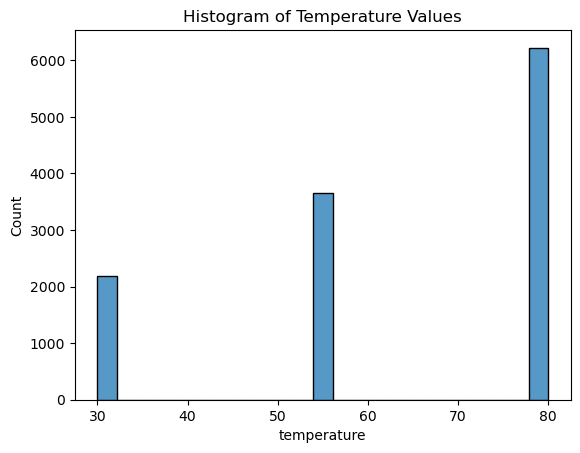

In [309]:
ax = sns.histplot(data=data, x="temperature")
ax.set_title("Histogram of Temperature Values")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [310]:
df = data[(data["coupon"].str.contains("Bar"))]


2. What proportion of bar coupons were accepted?


In [307]:
df['Y'].value_counts(normalize=True) * 100

Y
0    58.808155
1    41.191845
Name: proportion, dtype: float64

In [ ]:
~41% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
---
**NOTE**

In all comparisons of acceptance rates below:
* A Y value of 1 is followed by the the coupon acceptance rate.
* A Y value of 0 is followed by the coupon rejection rate.

---

In [320]:
# acceptance rate of those who went to a bar 3 or fewer
three_or_less = df.query("((Bar == 'never') | (Bar == 'less1') | (Bar == '1~3'))")
ans3a = three_or_less["Y"].value_counts(normalize=True)
print("three or fewer")
print(ans3a)

# acceptance rate of those who went to a bar 4 or more
four_or_more = df.query("((Bar == '4~8') | (Bar == 'gt8'))")
ans3b = four_or_more["Y"].value_counts(normalize=True)
print(ans3b)

three or fewer
Y
0    0.627326
1    0.372674
Name: proportion, dtype: float64
Y
1    0.761658
0    0.238342
Name: proportion, dtype: float64


The acceptance rate for respondents that visited a bar 3 or fewer times was *~63%*
The acceptance rate for those that went more was *~76%*

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [242]:
# drivers who go to a bar more than once a month and are over the age of 25
ans4a = df.query("Bar != 'never' & age > 25")
selection = ans4a["Y"].value_counts(normalize=True)
print(selection)

# all others
ans4b = df.query("~(Bar != 'never' & age > 25)")
all_others = ans4b["Y"].value_counts(normalize=True)
print(all_others)

# Answer : Yes there is greater acceptance in the first category

Y
1    0.545238
0    0.454762
Name: proportion, dtype: float64
Y
0    0.692451
1    0.307549
Name: proportion, dtype: float64


In [ ]:
The acceptance rate for respondents that go to a bar more than once a month and are over the age of 25 was *~54%*
The acceptance rate for all others *~69%*

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [199]:
ans5 = df.query("~((Bar == 'never') | (Bar == 'less1')) & passenger != 'Kid(s)' & passenger != 'Alone' & ~(occupation == 'Farming Fishing & Forestry')")
ans5["Y"].value_counts(normalize=True)

Y
1    0.714286
0    0.285714
Name: proportion, dtype: float64

In [ ]:
* The acceptance rate for this group was *~71%*


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [243]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
ans6a = df.query("~((Bar == 'never') | (Bar == 'less1')) & passenger != 'Kid(s)' & passenger != 'Alone' & maritalStatus != 'widowed'")
ans6a["Y"].value_counts(normalize=True)

Y
1    0.714286
0    0.285714
Name: proportion, dtype: float64

In [232]:
# go to bars more than once a month and are under the age of 30
ans6b = df.query("~((Bar == 'never') | (Bar == 'less1')) & age < 30")
ans6b["Y"].value_counts(normalize=True)

Y
1    0.719512
0    0.280488
Name: proportion, dtype: float64

In [241]:
# go to cheap restaurants more than 4 times a month and income is less than 50K
# NOTE : one of values is 4~8, which includes 4 times a month, so this isn't entirely accurate

ans6c = df.query("((RestaurantLessThan20 == '4~8') | (RestaurantLessThan20 == 'gt8')) & ((income == 'Less than $12500') | (income == '$12500 - $24999') | (income == '$25000 - $37499') | (income == '$37500 - $49999'))")
ans6c["Y"].value_counts(normalize=True)            


Y
0    0.543544
1    0.456456
Name: proportion, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

If a driver has been to a bar more than once, they are more likely to accept than other respondents. However, if they have a child in the car, it correlates to a reduces likelihood of acceptance.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
Let's look at acceptance rate for coupon types.

In [323]:
acceptance_rates =  data.groupby(['coupon'])["Y"].value_counts(normalize=True)
print (acceptance_rates)

coupon                 Y
Bar                    0    0.588082
                       1    0.411918
Carry out & Take away  1    0.737719
                       0    0.262281
Coffee House           0    0.503669
                       1    0.496331
Restaurant(20-50)      0    0.553987
                       1    0.446013
Restaurant(<20)        1    0.709009
                       0    0.290991
Name: proportion, dtype: float64


"Carry out & Take away" coupons have a higher acceptance rate than other coupons. Let's look at what we can hypothesize about people that were offered this type of coupon. 


In [262]:
# create a new data frame for "Carry out and Take away" coupons.
explore_df = data[(data["coupon"].str.contains("Carry"))]

Let's look at what impact education has on acceptance rate by comparing the corresponding acceptance rates.

In [271]:
explore_df.groupby(['education'])["Y"].value_counts(normalize=True)

education                               Y
Associates degree                       1    0.831683
                                        0    0.168317
Bachelors degree                        1    0.721485
                                        0    0.278515
Graduate degree (Masters or Doctorate)  1    0.654286
                                        0    0.345714
High School Graduate                    1    0.742857
                                        0    0.257143
Some High School                        1    0.937500
                                        0    0.062500
Some college - no degree                1    0.761175
                                        0    0.238825
Name: proportion, dtype: float64

Respondents with Graduate degrees had an acceptance rate of ~65%, which is slightly reduced rate from the others, ranging from ~72% to ~93%.

In [272]:
explore_df.groupby(['maritalStatus'])["Y"].value_counts(normalize=True)

maritalStatus      Y
Divorced           1    0.722222
                   0    0.277778
Married partner    1    0.729306
                   0    0.270694
Single             1    0.757271
                   0    0.242729
Unmarried partner  1    0.708791
                   0    0.291209
Widowed            1    0.850000
                   0    0.150000
Name: proportion, dtype: float64

Respondents with a marital status of widowed had a response rate of ~85% which is higher than all others ranging from ~70% to ~75%. 

In [283]:
explore_df.query("maritalStatus == 'Widowed' & education == 'Graduate degree (Masters or Doctorate)'")

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


There are no participants that are widowed with a gradudate degree, so it's not possible to see if having both factors increases the acceptance rate significantly more.

In [298]:
explore_df.groupby(['time'])["Y"].value_counts(normalize=True)

time  Y
10AM  1    0.700000
      0    0.300000
10PM  1    0.767654
      0    0.232346
2PM   1    0.866029
      0    0.133971
6PM   1    0.820823
      0    0.179177
7AM   1    0.661180
      0    0.338820
Name: proportion, dtype: float64

2PM and 6PM correlate to a higher acceptance rate. It's possible sending carryout coupons closer to dinner time correlates with higher acceptance.



In [299]:
explore_df.groupby(['has_children'])["Y"].value_counts(normalize=True)

has_children  Y
0             1    0.736882
              0    0.263118
1             1    0.738860
              0    0.261140
Name: proportion, dtype: float64

Having children doesn't seem to appreciably change the acceptance rate.

In [300]:
explore_df.groupby(['passenger'])["Y"].value_counts(normalize=True)

passenger  Y
Alone      1    0.731889
           0    0.268111
Friend(s)  1    0.759547
           0    0.240453
Kid(s)     1    0.697183
           0    0.302817
Partner    1    0.717391
           0    0.282609
Name: proportion, dtype: float64

In [ ]:
Having a child passenger has a small negative impact on acceptance rate. 